Participation Notes – July 8-9, 2025  

**Course:** Data Visualization  
**Topics:** Subplots, Combined Visuals, and Error Representation  

This notebook documents the participation activities for July 8-9, focusing on techniques for combining multiple plots using subplots, mosaic layouts, and shared axes. The sessions also covered adding and styling error bars, controlling visual clutter with `errorevery`, and overlaying images within plots using additional axes. These approaches support clearer communication of complex visual data.


In [1]:
# Load required libraries and generate data for the session
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
np.random.seed(613)
x1 = np.arange(50)
y1 = np.random.randint(0, 75, 50)

x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y2 = np.array([110, 180, 240, 99, 220])

Using `plt.subplots()`, multiple plots can be arranged in a grid. Below, two plots are arranged horizontally using `ncols=2`.



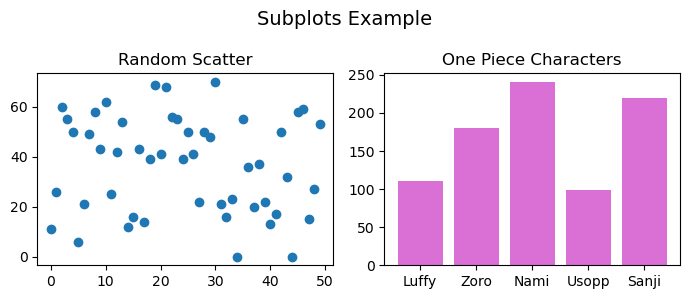

In [3]:
# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(7, 3))

# Left: scatter plot
ax1.scatter(x1, y1)
ax1.set_title("Random Scatter")

# Right: bar plot
ax2.bar(x2, y2, color="orchid")
ax2.set_title("One Piece Characters")

plt.suptitle("Subplots Example", fontsize=14)
plt.tight_layout()
plt.show()


`subplot_mosaic()` allows labeling subplots and arranging them in non-uniform grid layouts. It also makes later referencing easier.


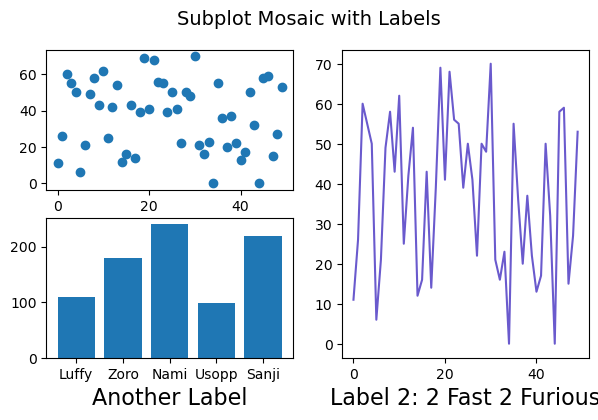

In [4]:
# Mosaic layout to create asymmetric grid arrangement
fig, axes = plt.subplot_mosaic([["ax1", "ax3"],
                                ["ax2", "ax3"]],
                                figsize=(7, 4))

# Assign plots to named axes
axes["ax1"].scatter(x1, y1)
axes["ax2"].bar(x2, y2)
axes["ax3"].plot(x1, y1, color="slateblue")

# Add labels to test layout behavior
axes["ax1"].set_xlabel("A Big Label", fontsize=16)
axes["ax2"].set_xlabel("Another Label", fontsize=16)
axes["ax3"].set_xlabel("Label 2: 2 Fast 2 Furious", fontsize=16)

plt.suptitle("Subplot Mosaic with Labels", fontsize=14)
plt.show()


The `constrained` layout option automatically manages spacing between subplots and axis labels.

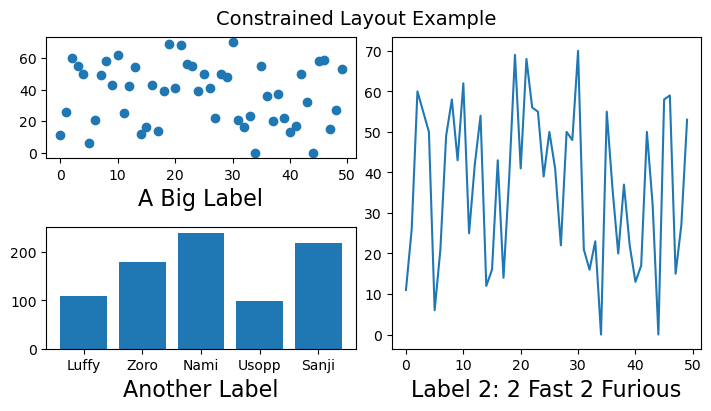

In [5]:
# Repeat mosaic but with constrained layout to fix label issues
fig, axes = plt.subplot_mosaic([["ax1", "ax3"],
                                ["ax2", "ax3"]],
                                figsize=(7, 4),
                                layout="constrained")

axes["ax1"].scatter(x1, y1)
axes["ax2"].bar(x2, y2)
axes["ax3"].plot(x1, y1)

# Improved label fitting
axes["ax1"].set_xlabel("A Big Label", fontsize=16)
axes["ax2"].set_xlabel("Another Label", fontsize=16)
axes["ax3"].set_xlabel("Label 2: 2 Fast 2 Furious", fontsize=16)

plt.suptitle("Constrained Layout Example", fontsize=14)
plt.show()


Multiple plot types can be overlaid on one axis to compare different data representations.



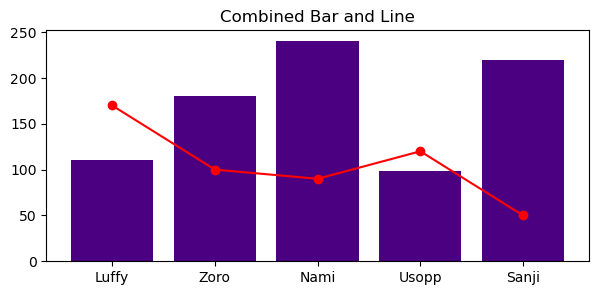

In [6]:
# Plot both bar and line on a single axes
fig, ax = plt.subplots(figsize=(7, 3))

ax.bar(x2, y2, color="indigo")
ax.plot(x2, [170, 100, 90, 120, 50], color="red", marker="o")

ax.set_title("Combined Bar and Line")
plt.show()


`errorbar()` allows adding error margins to line plots. This example shows standard deviation added to the y-values.

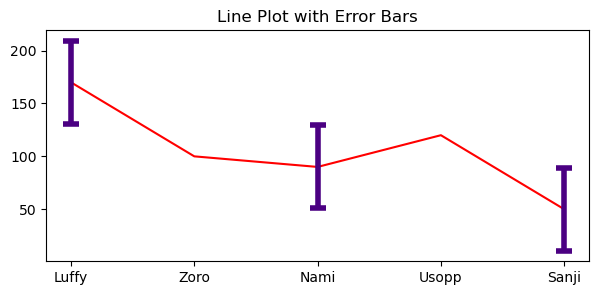

In [13]:
x = np.array(['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji'])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])

# Add error bars to a line plot
y2_sd = np.std(y2)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x2, y2, color="red")

# Add vertical error bars with style
ax.errorbar(x2, y2, yerr=y2_sd, fmt="none",
            ecolor="indigo",         # Color of error lines
            elinewidth=4,            # Thickness of error lines
            capsize=6,               # Size of the caps on error bars
            capthick=4,              # Thickness of the caps
            errorevery=2)            # Show error every 2 points

ax.set_title("Line Plot with Error Bars")
plt.show()


An image can be overlaid on top of an existing plot using `fig.add_axes()` to create a smaller, inset axis.

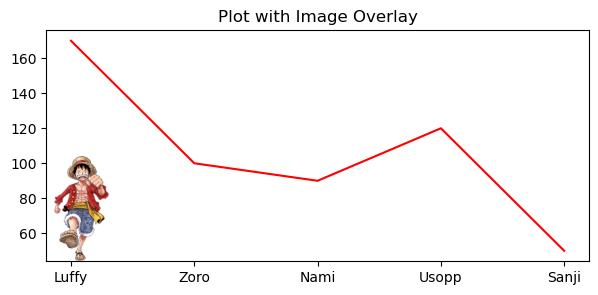

In [18]:
# Load image from web and prepare for overlay
from PIL import Image
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Create plot and overlay image on top
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x2, y2, color="red")
ax.set_title("Plot with Image Overlay")  # Title above the plot area

# Add image in corner using absolute figure coordinates
ax_img = fig.add_axes([0.1, 0.11, 0.15, 0.35])
ax_img.imshow(image)
ax_img.axis('off')

plt.show()


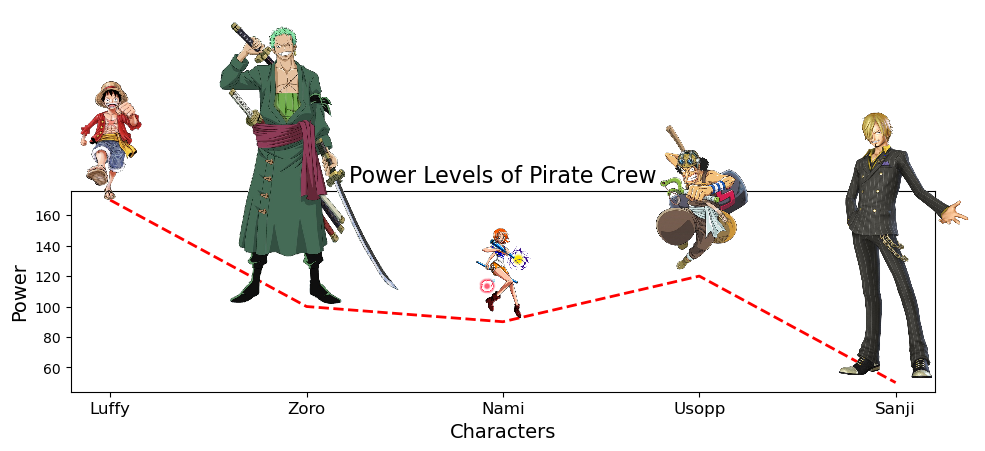

In [20]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import numpy as np
#Activity
x = np.arange(5)
y = [170, 100, 90, 120, 50]
labels = ["Luffy", "Zoro", "Nami", "Usopp", "Sanji"]

image_urls = {
    "Luffy": "https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png",
    "Zoro": "https://static.wikia.nocookie.net/characterprofile/images/5/50/Roronoa_Zoro.png/revision/latest?cb=20170117203410",
    "Nami": "https://static.wikia.nocookie.net/characterprofile/images/a/a7/NamiPrTS.png/revision/latest/scale-to-width-down/350?cb=20220809214156",
    "Usopp": "https://static.wikia.nocookie.net/characterprofile/images/1/12/UsoppAngryPNGImage.png/revision/latest?cb=20231202183733",
    "Sanji": "https://static.wikia.nocookie.net/characterprofile/images/0/06/One-Piece-Pirate-Warriors-2-Sanji.png/revision/latest?cb=20160108011019"
}
# Plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot line
ax.plot(x, y, linestyle='--', color='red', linewidth=2)

# Set labels
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel("Power", fontsize=14)
ax.set_xlabel("Characters", fontsize=14)
ax.set_title("Power Levels of Pirate Crew", fontsize=16)

# Overlay character images at each data point
for i, label in enumerate(labels):
    response = requests.get(image_urls[label])
    image = Image.open(BytesIO(response.content))
    imagebox = OffsetImage(image, zoom=0.2)
    ab = AnnotationBbox(imagebox, (x[i], y[i]), frameon=False, box_alignment=(0.5, 0))
    ax.add_artist(ab)

plt.tight_layout()
plt.show()

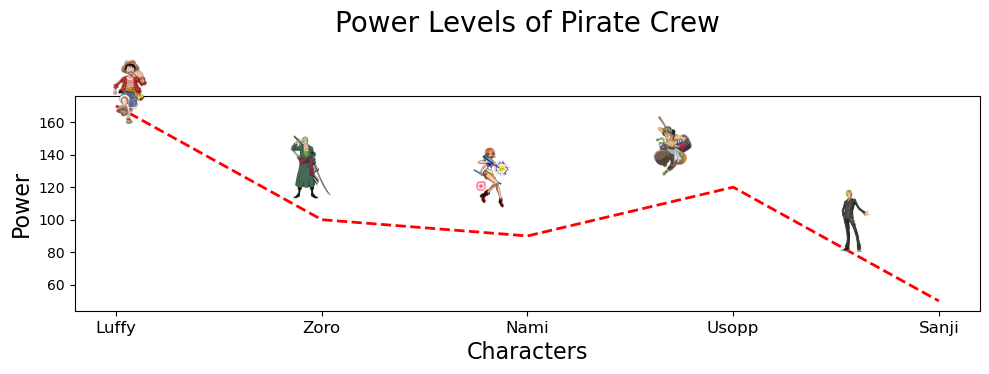

In [24]:

import requests

#  Dataset
characters = ['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji']
power_levels = [170, 100, 90, 120, 50]
x = np.arange(len(characters))

# Image URLs
image_urls = {
    "Luffy": "https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png",
    "Zoro": "https://static.wikia.nocookie.net/characterprofile/images/5/50/Roronoa_Zoro.png/revision/latest?cb=20170117203410",
    "Nami": "https://static.wikia.nocookie.net/characterprofile/images/a/a7/NamiPrTS.png/revision/latest/scale-to-width-down/350?cb=20220809214156",
    "Usopp": "https://static.wikia.nocookie.net/characterprofile/images/1/12/UsoppAngryPNGImage.png/revision/latest?cb=20231202183733",
    "Sanji": "https://static.wikia.nocookie.net/characterprofile/images/0/06/One-Piece-Pirate-Warriors-2-Sanji.png/revision/latest?cb=20160108011019"
}

#  Plot setup
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, power_levels, color="red", linestyle="--", linewidth=2)
ax.set_xticks(x)
ax.set_xticklabels(characters, fontsize=12)
ax.set_ylabel("Power", fontsize=16)
ax.set_xlabel("Characters", fontsize=16)
ax.set_title("Power Levels of Pirate Crew", fontsize=20, pad=20)

# Overlay each character image at the corresponding (x, y) location
for i, name in enumerate(characters):
    url = image_urls[name]
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    
    # Set zoom/image size relative to axis scale
    imagebox = ax.inset_axes([x[i]/len(characters) + 0.02, power_levels[i]/200 + 0.02, 0.08, 0.3], transform=ax.transAxes)
    imagebox.imshow(image)
    imagebox.axis('off')

plt.tight_layout()
plt.show()

---
Accessible Data Visualization 20250709

Daily Routines of Creative People
The original chart is praised for aesthetic clarity and effective comparison, but becomes inaccessible when viewed by users with deuteranopia or achromatopsia.

Key observations:

- Colours that appear distinct to non-colourblind users may collapse into indistinguishable shades.
- Lack of direct labels means users relying on hue cannot interpret categories.
- Without texture, pattern, or labels, the visualization fails to communicate its core message to all users.

This highlights the danger of over-relying on hue alone to convey meaning.

Flatten the Curve – Accessibility in Critical Communication
The “Flatten the Curve” chart became iconic during the COVID-19 pandemic. While it communicates key trends effectively, it presents several accessibility challenges:

- The text is embedded as an image, making it unreadable by screen readers.
- Small font sizes hinder legibility.
- Absence of alternative text or captions excludes users with visual impairments.

This example shows how accessibility oversights can limit the impact of even widely shared public health graphics.



Writing Good Alt-Text
Alt-text helps screen reader users access visual content. Effective alt-text:

- Clearly describes the key insight
- Avoids overly technical or editorialized language
- Includes chart title, trends, axis context, and major outliers if relevant

Decorative images need minimal description, but data plots require meaningful summaries.